In [22]:

import seaborn as sns
import pandas as pd

In [23]:
df= pd.read_csv("loan_approval_dataset.csv")

In [24]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Measuring label imbalance

In [25]:
df[' loan_status'].value_counts()

 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

## Finding the shape of the table and columns

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [27]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [28]:
df.describe(include=['object', 'category', 'bool'])

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


In [29]:
df[' education'].value_counts()

 education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

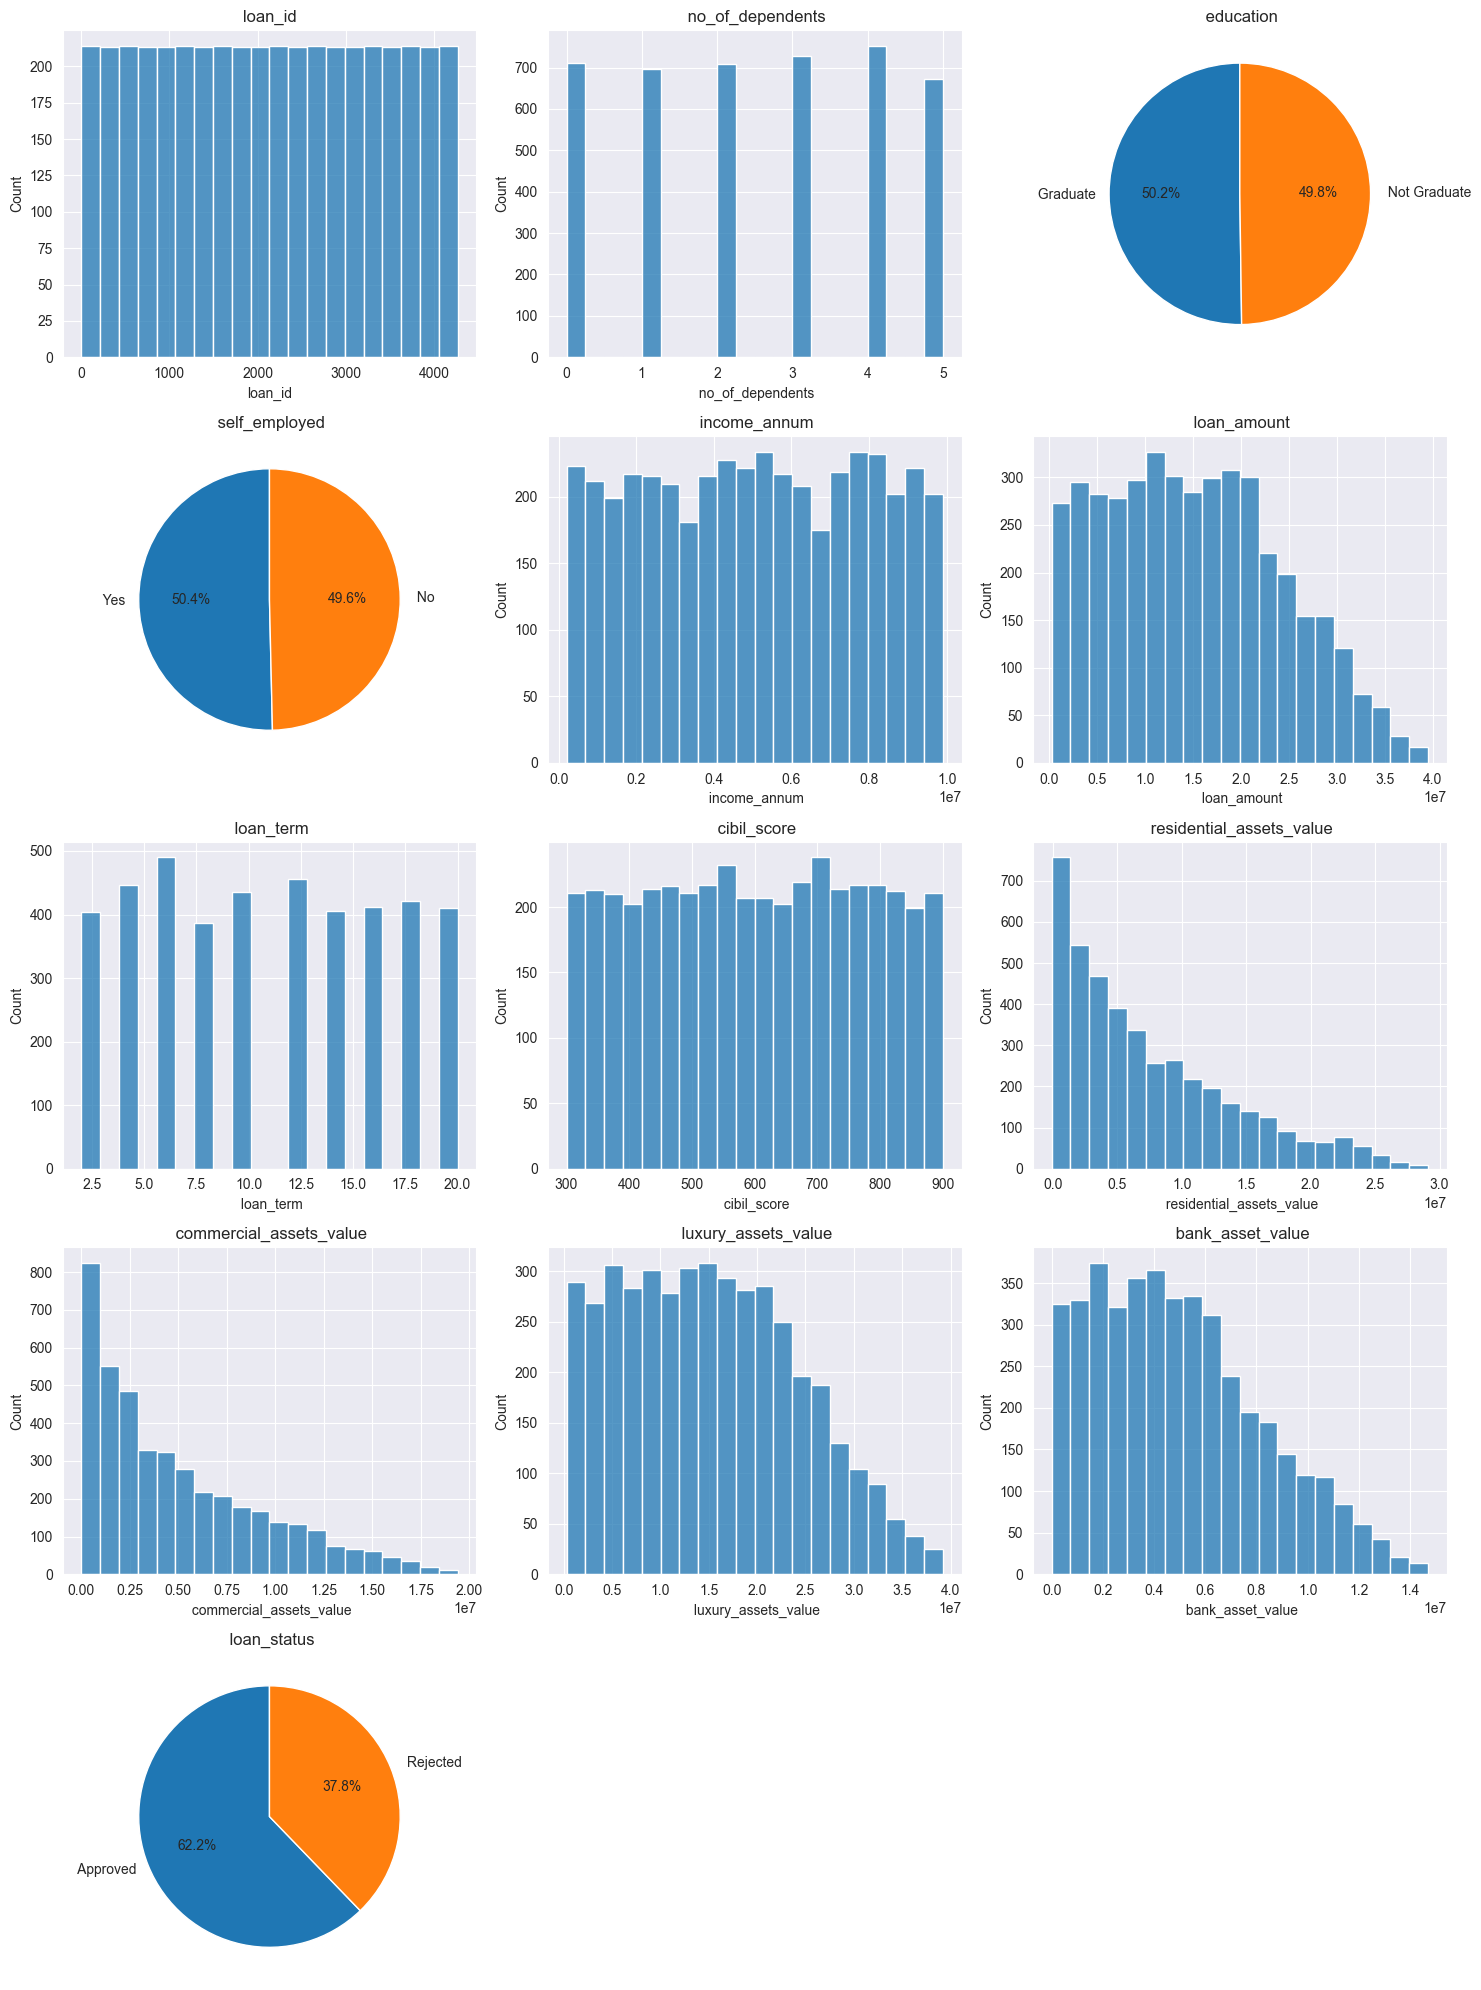

In [30]:
from MyPipeline.EDA_Module import plot_dataset, transform_skewed_features
plot_dataset(df)

## managing skewed columns

In [31]:
probably_skewed_columns= [' commercial_assets_value', ' luxury_assets_value',' bank_asset_value',' residential_assets_value',' loan_amount']
df[probably_skewed_columns].skew()
## mid_skew is between (-0.5 and 0.5)

commercial_assets_value     0.957791
luxury_assets_value         0.322208
bank_asset_value            0.560725
residential_assets_value    0.978451
loan_amount                 0.308724
dtype: float64

In [32]:
idx_skewed=abs(df[probably_skewed_columns].skew())>0.55
skewed_columns=idx_skewed.index
skewed_columns.to_list()

[' commercial_assets_value',
 ' luxury_assets_value',
 ' bank_asset_value',
 ' residential_assets_value',
 ' loan_amount']

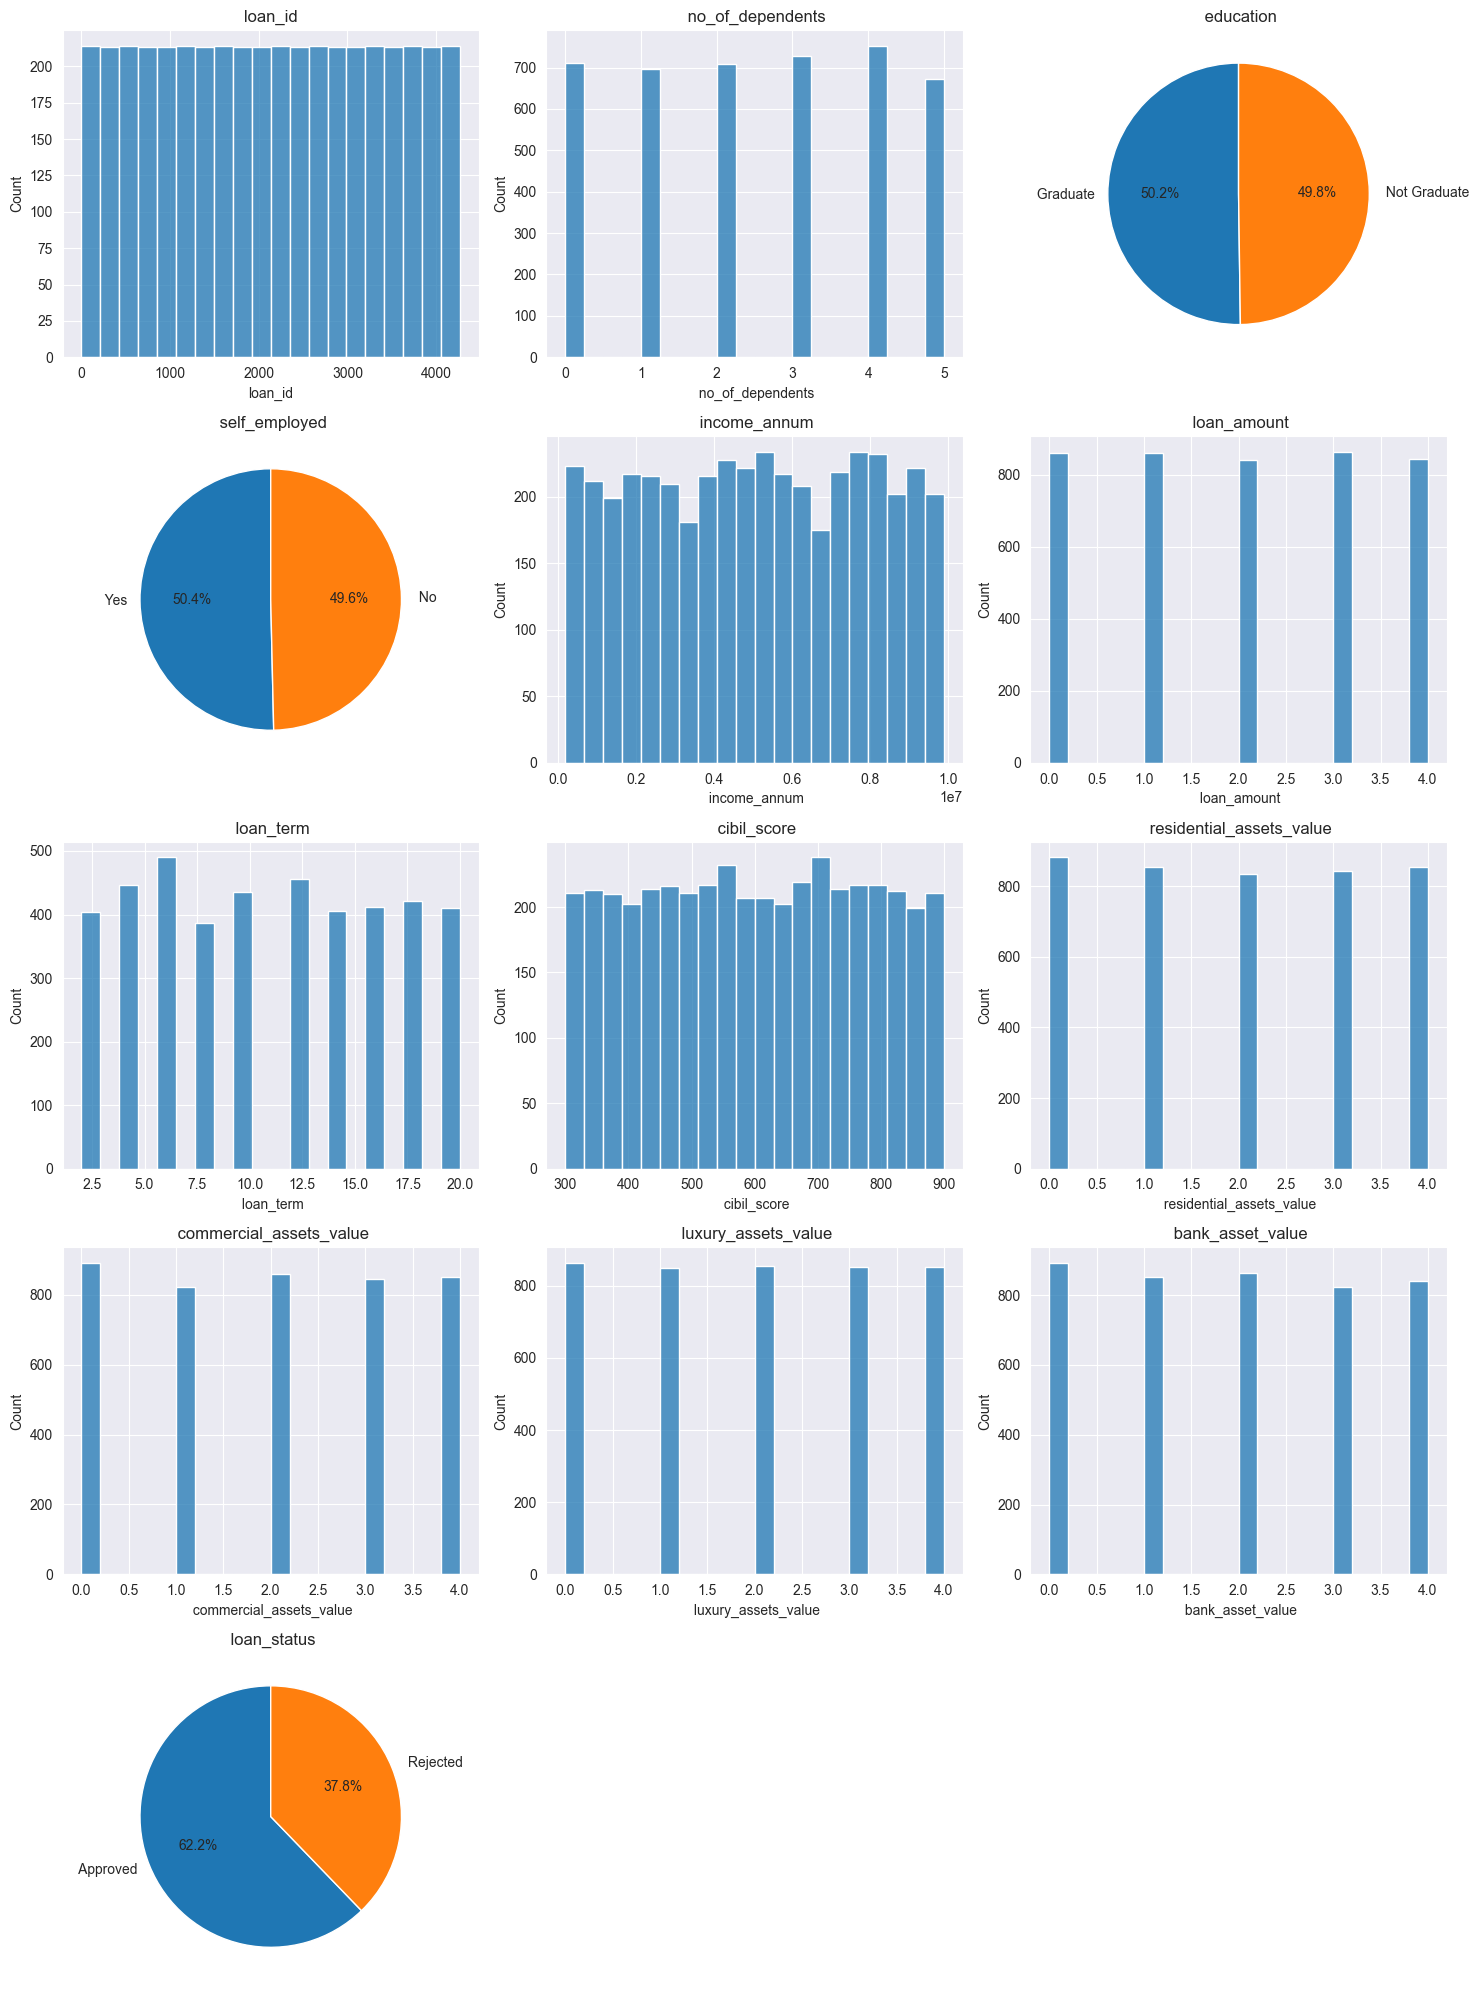

In [33]:
#skewed_columns= [' commercial_assets_value', ' residential_assets_value']
skew_handling_method='bin'
df_normalized= transform_skewed_features(df, skewed_columns,skew_handling_method)
plot_dataset(df_normalized)

In [34]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
categorical_columns= [' education', ' self_employed', ' loan_status']
discrete_columns= categorical_columns+['loan_id',' no_of_dependents']
for column in categorical_columns:
    df_normalized[column]= LabelEncoder().fit_transform(df_normalized[column])
if skew_handling_method=='bin' :
    discrete_columns += skewed_columns


In [35]:
df.nunique()

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

In [36]:
# counting duplicate rows
df.duplicated().sum()

np.int64(0)

KeyboardInterrupt: 

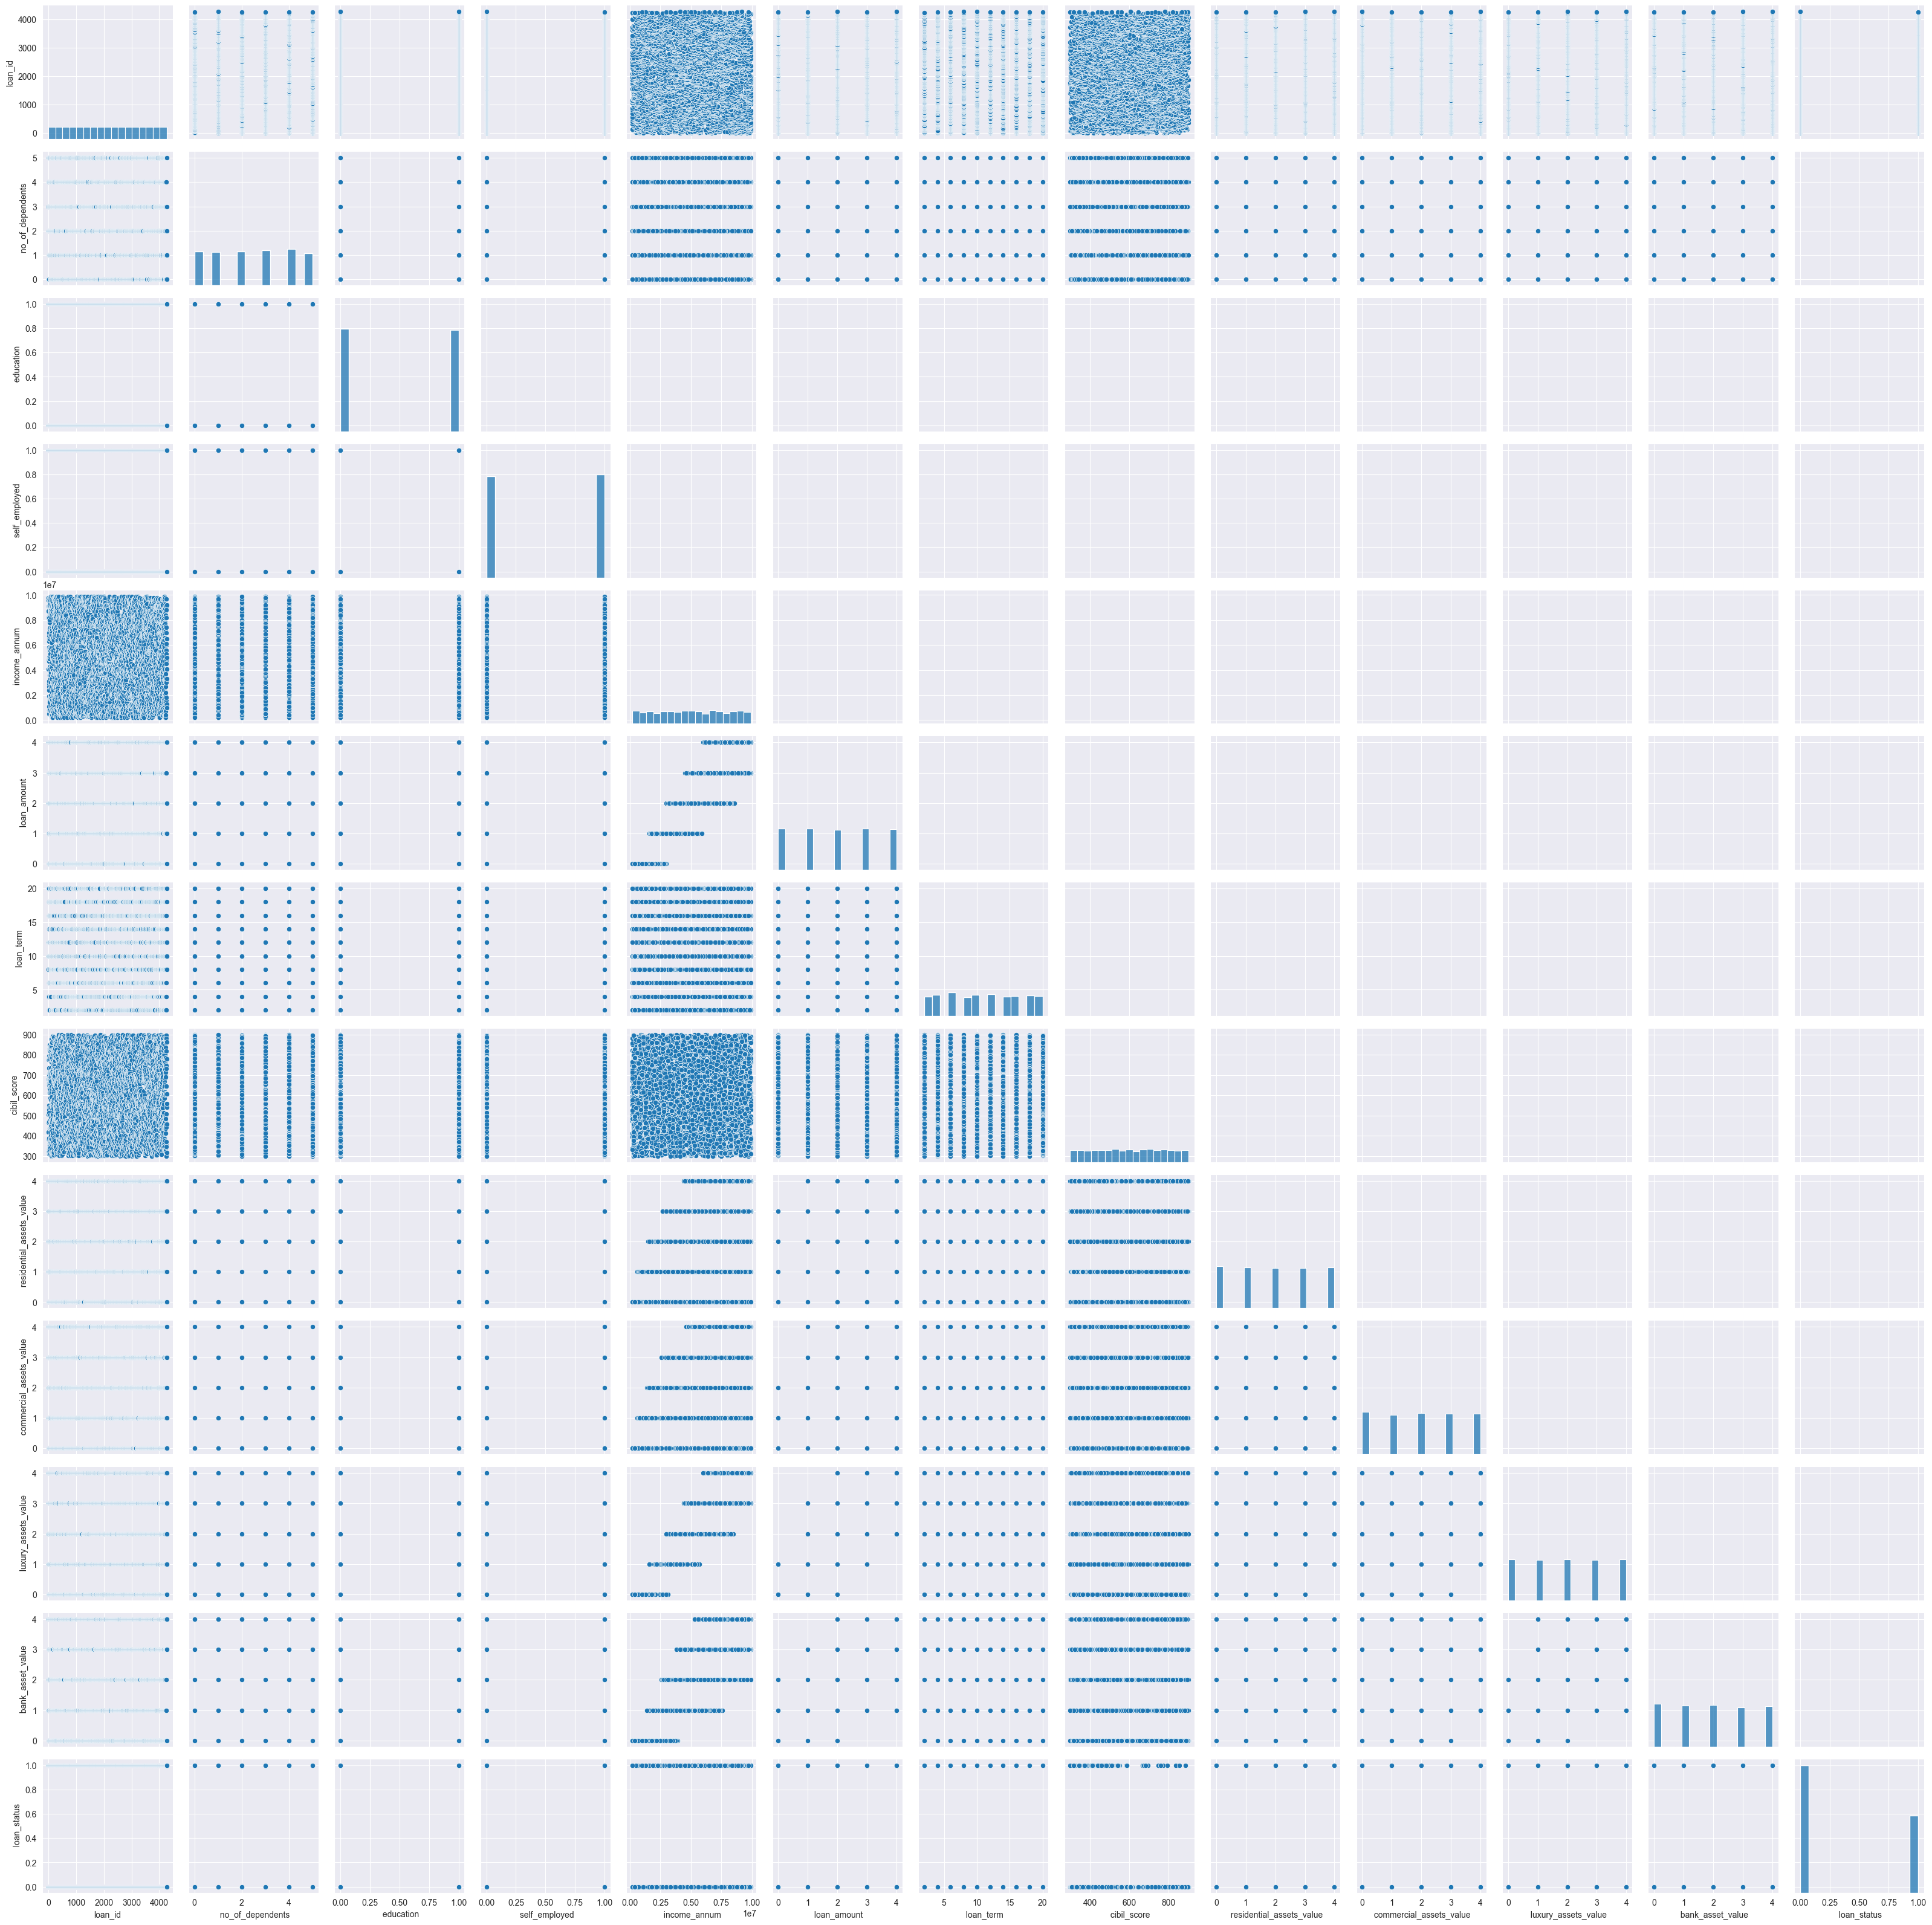

In [37]:
sns.pairplot(df_normalized)

In [133]:
df_normalized.corr()[' loan_status']

loan_id                     -0.017685
 no_of_dependents            0.018114
 education                   0.004918
 self_employed              -0.000345
 income_annum                0.015189
 loan_amount                -0.016150
 loan_term                   0.113036
 cibil_score                -0.770518
 residential_assets_value    0.014755
 commercial_assets_value    -0.010433
 luxury_assets_value         0.015465
 bank_asset_value            0.006778
 loan_status                 1.000000
Name:  loan_status, dtype: float64

## Feature engineering
### adding new features by prior knowledge

In [146]:
df_normalized['monthly_payment']= df_normalized[' loan_amount']/df_normalized[' loan_term']
df_normalized['Monthly_income_after_loan']= df_normalized[' income_annum']/12 - df_normalized['monthly_payment']
df_normalized['dependent_remaining']=  df_normalized['Monthly_income_after_loan']/ (df_normalized[' no_of_dependents']+1)

df_normalized['Total_assets']= df_normalized[[' commercial_assets_value', ' luxury_assets_value',' bank_asset_value']].sum(axis=1)
df_normalized['Assets_to_loan_ratio']= df_normalized['Total_assets']/df_normalized[' loan_amount']

In [147]:
total_columns=list(df_normalized.columns)
for cat_column in discrete_columns:
    total_columns.remove(cat_column)
numerical_columns =total_columns
print(numerical_columns)

[' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' luxury_assets_value', ' bank_asset_value', 'monthly_payment', 'Monthly_income_after_loan', 'dependent_remaining', 'Total_assets', 'Assets_to_loan_ratio']


In [153]:
df_scaled= df_normalized.drop('loan_id',axis=1).copy()
df_scaled[numerical_columns]= StandardScaler().fit_transform(df_scaled[numerical_columns])
df_scaled.corr()[' loan_status']

 no_of_dependents            0.018114
 education                   0.004918
 self_employed              -0.000345
 income_annum                0.015189
 loan_amount                -0.016150
 loan_term                   0.113036
 cibil_score                -0.770518
 residential_assets_value    0.014755
 commercial_assets_value    -0.010433
 luxury_assets_value         0.015465
 bank_asset_value            0.006778
 loan_status                 1.000000
monthly_payment             -0.125542
Monthly_income_after_loan    0.132035
dependent_remaining          0.103413
Total_assets                 0.013755
Assets_to_loan_ratio         0.068253
Name:  loan_status, dtype: float64

In [158]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_scaled.drop(' loan_status',axis=1), df_scaled[' loan_status'] , test_size=0.2, random_state=42)

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, mean_squared_error
model= LogisticRegression().fit(X_train, y_train)
y_pred_test= model.predict(X_test)
loss= mean_squared_error(y_test, y_pred_test)
report= classification_report(y_test, y_pred_test)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       536
           1       0.89      0.89      0.89       318

    accuracy                           0.92       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.92      0.92      0.92       854



In [164]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       536
           1       0.99      0.97      0.98       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [166]:
import joblib as jl
jl.dump(model, 'model.pkl')

['model.pkl']

In [173]:
model.feature_importances_

array([0.00437399, 0.00141876, 0.00130772, 0.01342813, 0.01494533,
       0.02919784, 0.81058722, 0.0040929 , 0.00300441, 0.01212815,
       0.00892953, 0.01866049, 0.02043221, 0.01460498, 0.01269174,
       0.03019659])

In [168]:
model_loaded=jl.load('model.pkl')

In [174]:
model_loaded.feature_importances_

array([0.00437399, 0.00141876, 0.00130772, 0.01342813, 0.01494533,
       0.02919784, 0.81058722, 0.0040929 , 0.00300441, 0.01212815,
       0.00892953, 0.01866049, 0.02043221, 0.01460498, 0.01269174,
       0.03019659])

ValueError: list.remove(x): x not in list